In [1]:


### import .xlsx file
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

x1 = pd.read_csv('CALW - PM Export 02-04-18.csv')
x1.head()

,Date,ESC,batteryTemperature,batteryVoltage,batteryCurrent,LRDCode_BTY model_Type,AH,Strings,Float Load,Discharge Load,Manufacture year,Installation year,Capacity,Reserve Stated in NP,C
0,15:00.0,PowerManager=CALW0PA,20,54.85,-3,CALWMG02_PWL12V100FT_VR,390,4,129,145.1,6,5,13%,0.133333,0.372051
1,30:00.0,PowerManager=CALW0PA,20,54.85,-3,CALWMG02_PWL12V100FT_VR,390,4,129,145.1,6,5,13%,0.133333,0.372051
2,45:00.0,PowerManager=CALW0PA,20,54.85,-3,CALWMG02_PWL12V100FT_VR,390,4,129,145.1,6,5,13%,0.133333,0.372051
3,00:00.0,PowerManager=CALW0PA,20,54.85,-3,CALWMG02_PWL12V100FT_VR,390,4,129,145.1,6,5,13%,0.133333,0.372051
4,15:00.0,PowerManager=CALW0PA,20,54.85,-3,CALWMG02_PWL12V100FT_VR,390,4,129,145.1,6,5,13%,0.133333,0.372051


In [2]:
x2 = x1.drop(x1.columns[[0,1,5]], axis=1)
x2.head()

,batteryTemperature,batteryVoltage,batteryCurrent,AH,Strings,Float Load,Discharge Load,Manufacture year,Installation year,Capacity,Reserve Stated in NP,C
0,20,54.85,-3,390,4,129,145.1,6,5,13%,0.133333,0.372051
1,20,54.85,-3,390,4,129,145.1,6,5,13%,0.133333,0.372051
2,20,54.85,-3,390,4,129,145.1,6,5,13%,0.133333,0.372051
3,20,54.85,-3,390,4,129,145.1,6,5,13%,0.133333,0.372051
4,20,54.85,-3,390,4,129,145.1,6,5,13%,0.133333,0.372051


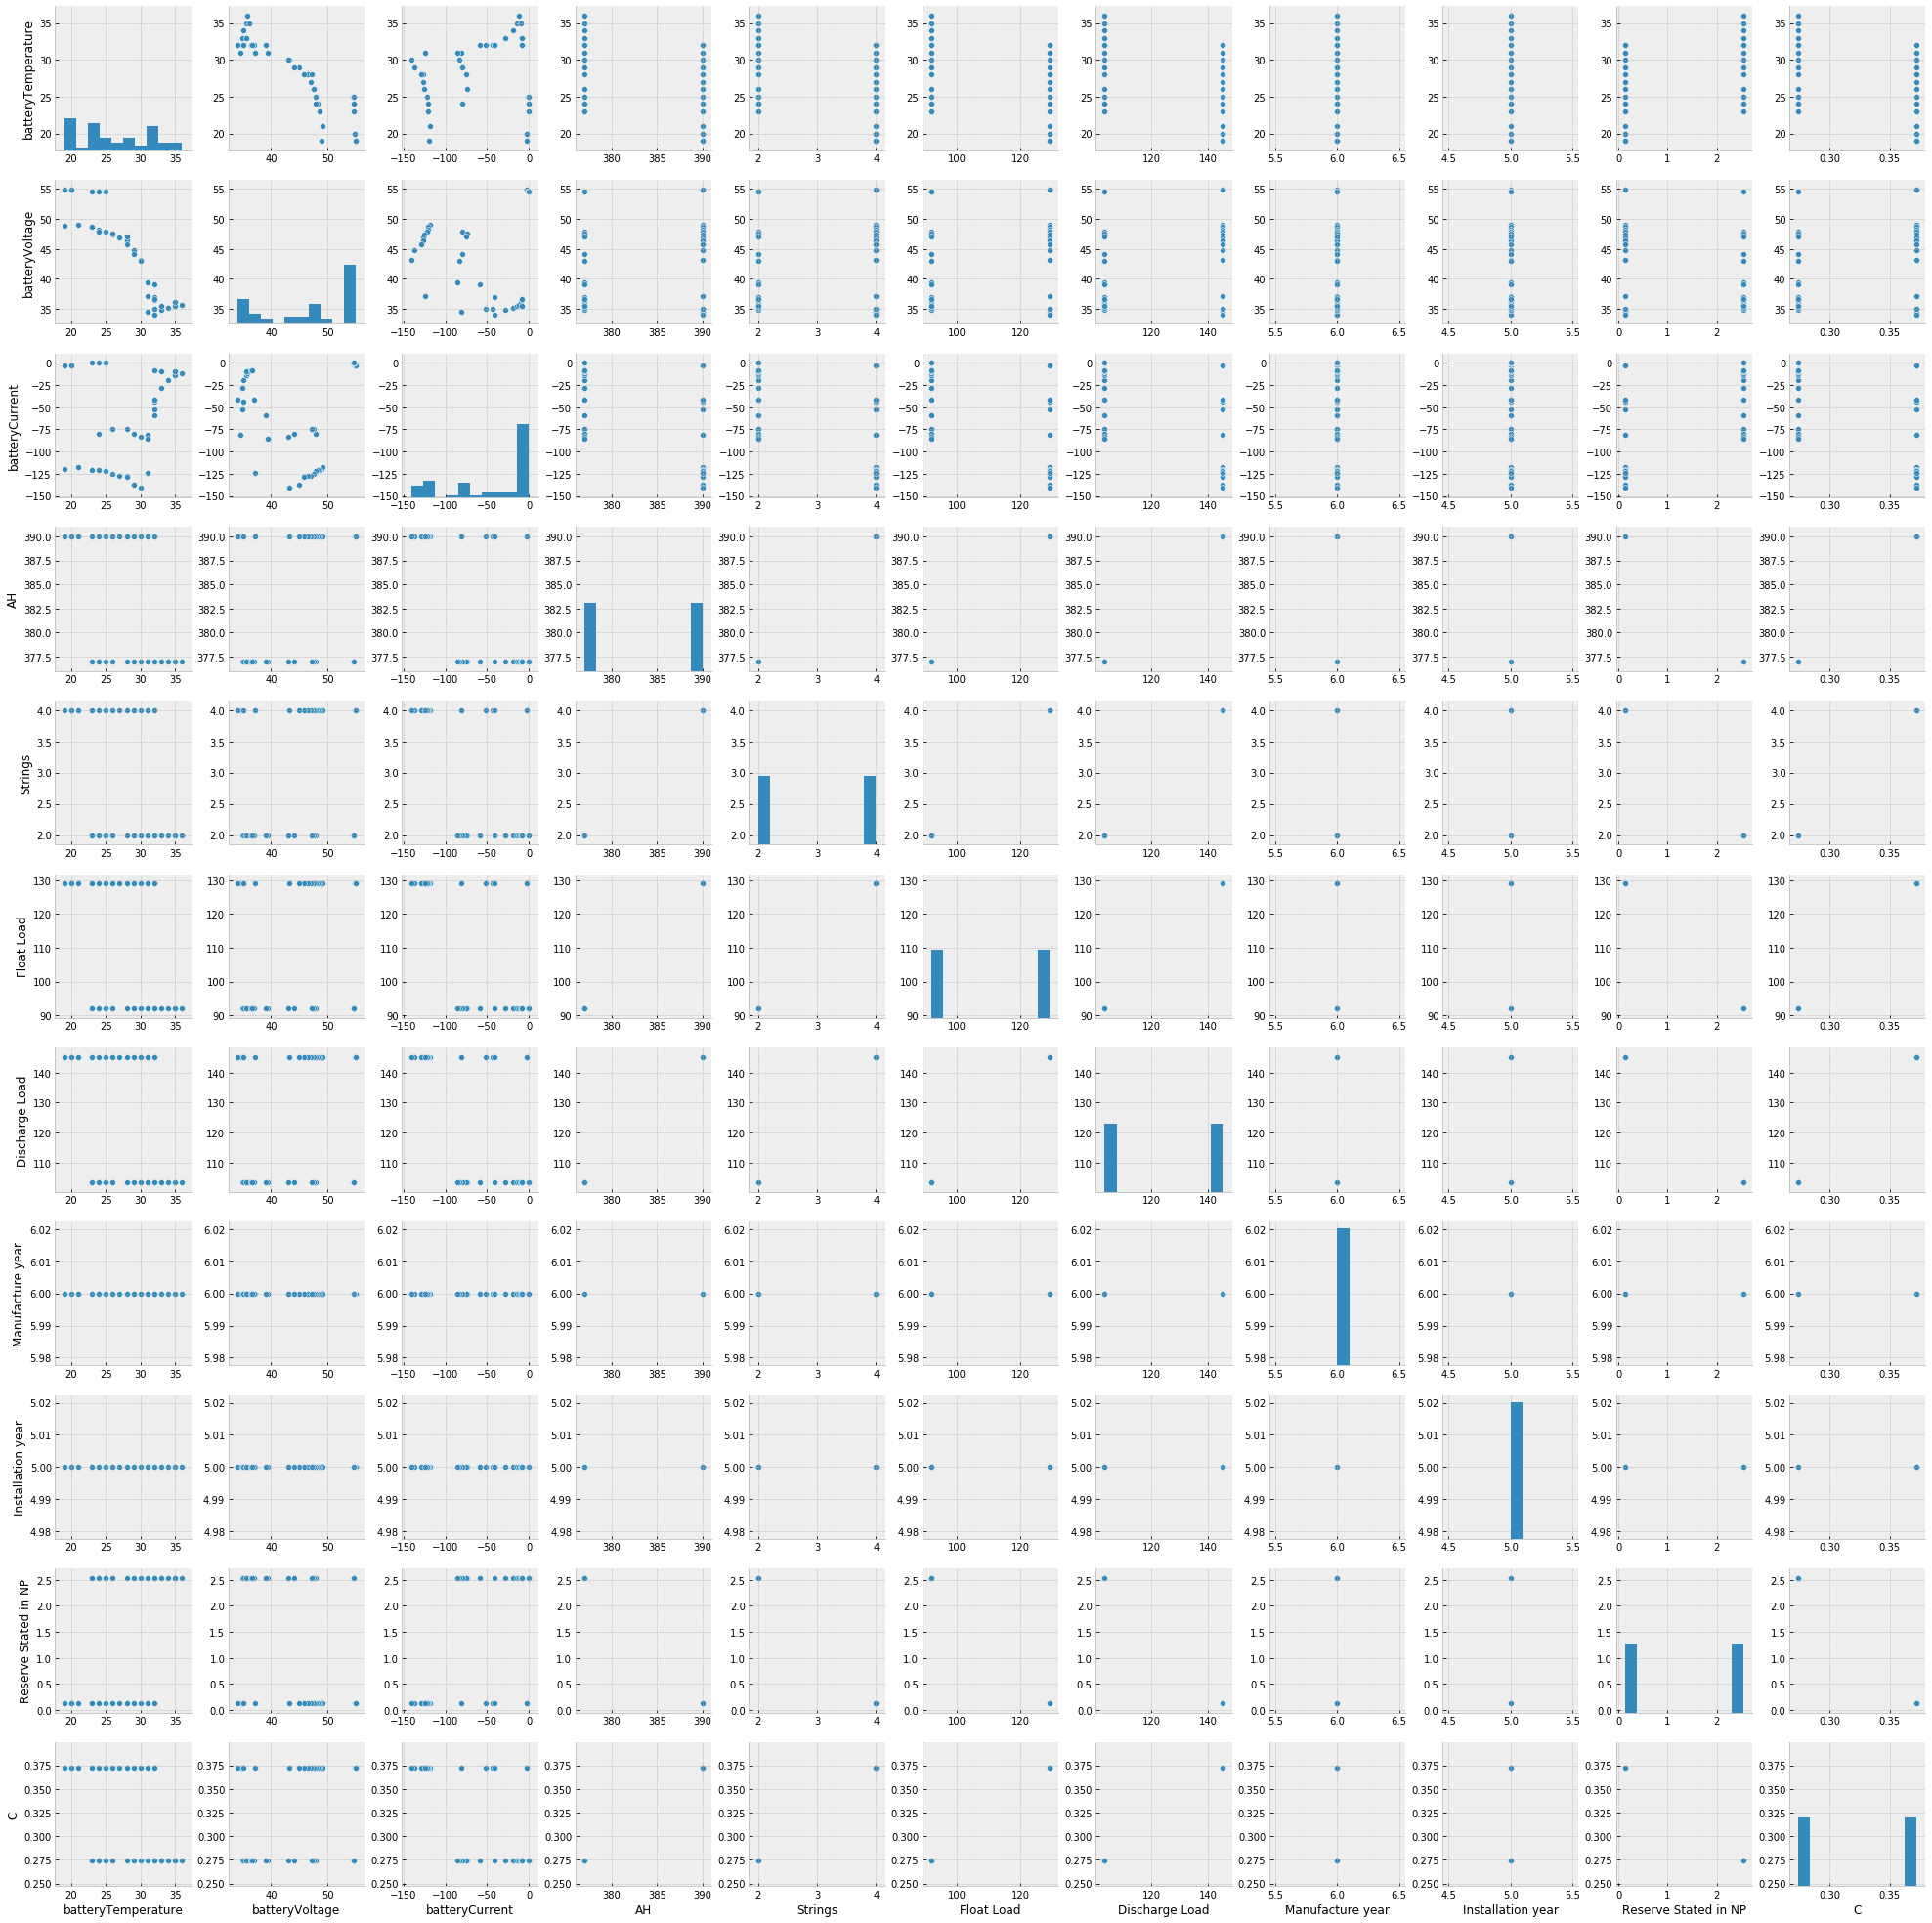

In [3]:
import seaborn as sns
plt.style.use('bmh')
%matplotlib inline

sns.pairplot(x2)

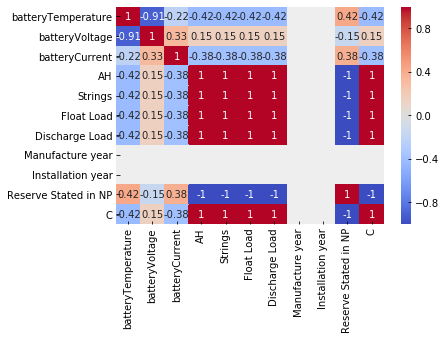

In [4]:
sns.heatmap(x2.corr(), cmap='coolwarm', annot=True)

In [9]:
x2['Capacity'] = x2['Capacity'].str.rstrip('%').astype('float') / 100.0

In [21]:
x = x2[['batteryTemperature','batteryCurrent','AH','Strings','Float Load','Discharge Load','Manufacture year','Installation year','Capacity','Reserve Stated in NP','C']]
y = x2['batteryVoltage']

from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
lm = LinearRegression()
lm.fit(X_train,y_train)

In [23]:
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         batteryVoltage   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     152.6
Date:                Tue, 12 Jun 2018   Prob (F-statistic):           9.34e-26
Time:                        17:10:49   Log-Likelihood:                -130.74
No. Observations:                  56   AIC:                             269.5
Df Residuals:                      52   BIC:                             277.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
batteryTemperature      -1.5940      0.084    -18.942      0.000      -1.763      -1.425
batteryCurrent          -0.0020      0.008     -0.241      0.811      -0.019       0.015
AH                       0.2968      0.012     24.656      0.000       0.273       0.321
Strings                 -0.0083      0.001    -10.255      0.000      -0.010      -0.007
Float Load              -0.1006      0.012     -8.059      0.000      -0.126      -0.076
Discharge Load          -0.1130      0.014     -8.057      0.000      -0.141      -0.085
Manufacture year         0.0058      0.000     20.524      0.000       0.005       0.006
Installation year        0.0048      0.000     20.524      0.000       0.004       0.005
Capacity                 0.0054      0.000     12.361      0.000       0.004       0.006
Reserve Stated in NP     0.0147      0.001     12.286      0.000       0.012       0.017
C                       -0.0002   3.14e-05     -7.446      0.000      -0.000      -0.000
==============================================================================
Omnibus:                        1.686   Durbin-Watson:                   0.608
Prob(Omnibus):                  0.430   Jarque-Bera (JB):                1.174
Skew:                          -0.350   Prob(JB):                        0.556
Kurtosis:                       3.110   Cond. No.                     3.70e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.29e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [11]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])

In [12]:
coeff_df

,Coefficient
batteryTemperature,-1.561921e+00
batteryCurrent,3.555472e-03
AH,1.326158e+12
Strings,-7.699142e+10
Float Load,-1.753824e+12
Discharge Load,1.155328e+12
Manufacture year,0.000000e+00
Installation year,0.000000e+00
Capacity,3.496840e+10
Reserve Stated in NP,9.388257e+10


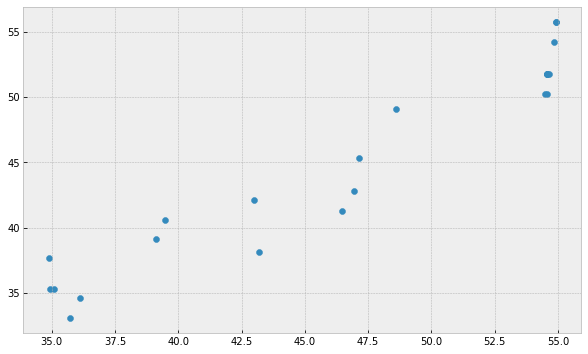

In [14]:
predictions  = lm.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

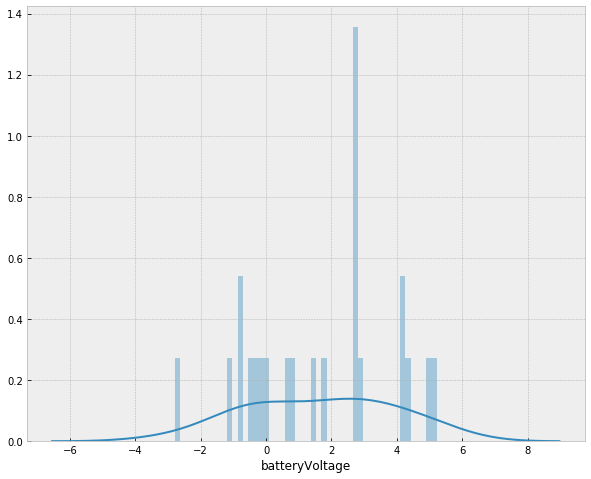

In [16]:
plt.figure(figsize=(10,8))
sns.distplot((y_test-predictions),bins=50)

In [17]:
from  sklearn import  metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.21010869565
MSE: 7.32989157609
RMSE: 2.70737725042
